# **链家网上海租房数据分析**

## 一、数据读取

In [1]:
import seaborn as sns
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_excel("链家网上海租房信息汇总.xlsx")
data.head()

,ceng,chaoxiang,date,kanguo,mianji,price,region,shiting,street,title,xiaoqu
0,中区/8层,朝南,2017.08.20\n\t\t\t\t\t\t\t上架,17,66平,4600,浦东,2室1厅,唐镇,好房好心情，钥匙在链家，受欢迎好房，精致户型,毕加索小镇（一期）（公寓）
1,高区/7层,朝南北,2017.08.19\n\t\t\t\t\t\t\t上架,26,50平,3700,闵行,1室1厅,静安新城,静安新城，南北通，光线非常好，人气房源,静安新城（三区）
2,中区/11层,朝南北,2017.08.14\n\t\t\t\t\t\t\t上架,27,89平,7500,浦东,3室2厅,三林,万科金色雅筑，链家好房，3房出租，有钥匙房源,万科金色雅筑
3,中区/4层,朝南,2017.08.13\n\t\t\t\t\t\t\t上架,11,32平,7000,静安,1室0厅,南京西路,升平小区，低楼层，实地看房，上门实拍,升平小区
4,中区/6层,无朝向数据,2017.08.09\n\t\t\t\t\t\t\t上架,24,57平,3800,杨浦,2室1厅,中原,市光三村，交通方便，放心好房，有钥匙方便看,市光三村


## 二、数据概况

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31129 entries, 0 to 31128
Data columns (total 11 columns):
ceng         31129 non-null object
chaoxiang    31129 non-null object
date         31129 non-null object
kanguo       31129 non-null int64
mianji       31129 non-null object
price        31129 non-null int64
region       31129 non-null object
shiting      31129 non-null object
street       31129 non-null object
title        31129 non-null object
xiaoqu       31129 non-null object
dtypes: int64(2), object(9)
memory usage: 2.8+ MB


In [3]:
data.apply(lambda x : sum(x.isnull()))

ceng         0
chaoxiang    0
date         0
kanguo       0
mianji       0
price        0
region       0
shiting      0
street       0
title        0
xiaoqu       0
dtype: int64

In [4]:
data[data["price"] > 100000]

,ceng,chaoxiang,date,kanguo,mianji,price,region,shiting,street,title,xiaoqu
1652,低区/3层,朝南北,2017.08.12\n\t\t\t\t\t\t\t上架,7,740平,180000,黄浦,9室2厅,淮海中路,曲园，房型正气，低楼层，链家房源,曲园
2286,低区/3层,朝南,2017.03.08\n\t\t\t\t\t\t\t上架,6,394平,120000,静安,6室2厅,静安寺,钥匙在店，出行方便，实地看房，低楼层,乌鲁木齐中路15弄
4669,地上2层,无朝向数据,2017.08.11\n\t\t\t\t\t\t\t上架,12,806平,130000,浦东,5室4厅,花木,御翠园，好房待租，近地铁，上门实拍,御翠园
6331,地上2层,无朝向数据,2017.05.07\n\t\t\t\t\t\t\t上架,13,483平,120000,浦东,5室3厅,花木,御翠园，多次带看，近地铁，5室3厅6卫,御翠园
8658,低区/4层,朝南北,2017.03.03\n\t\t\t\t\t\t\t上架,4,1338平,580000,黄浦,9室9厅,人民广场,低楼层，上门实勘，近地铁，南北通,凤阳路338号
11181,高区/40层,朝西,2017.08.23\n\t\t\t\t\t\t\t上架,3,362平,120000,浦东,4室2厅,陆家嘴,在租四房，真实在租，地铁沿线，视野开阔,中粮海景壹号
11441,低区/1层,朝南,2017.08.02\n\t\t\t\t\t\t\t上架,6,329平,120000,静安,5室3厅,南京西路,新闸路1748号，人气房源，地铁沿线，上下楼方便,新闸路1748号
11826,地上2层,无朝向数据,2017.05.26\n\t\t\t\t\t\t\t上架,4,349平,105000,闵行,4室4厅,古美,万源城御溪，附近有地铁，4室4厅，实地看房,万源城御溪（别墅）
15288,中区/10层,朝南北,2017.07.23\n\t\t\t\t\t\t\t上架,1,324平,120000,黄浦,5室3厅,新天地,翠湖天地御苑，5室3厅，链家好房，光线充足,翠湖天地御苑
16396,地上2层 地下1层,无朝向数据,2017.04.29\n\t\t\t\t\t\t\t上架,1,1000平,250000,松江,5室4厅,佘山,佘山高尔夫郡，5室4厅，高清大图，附近有地铁,佘山高尔夫郡


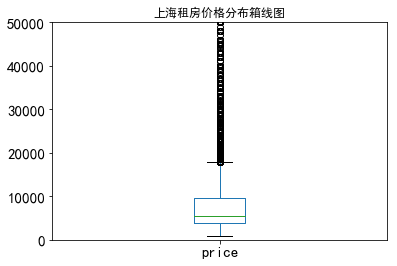

In [5]:
from pylab import *  
mpl.rcParams['font.sans-serif'] = ['SimHei']  
data["price"].plot(kind = "box", fontsize = 15)
plt.ylim(0,50000)
plt.title("上海租房价格分布箱线图")
plt.show()

## 三、数据清洗和探索分析

In [6]:
data.head()

,ceng,chaoxiang,date,kanguo,mianji,price,region,shiting,street,title,xiaoqu
0,中区/8层,朝南,2017.08.20\n\t\t\t\t\t\t\t上架,17,66平,4600,浦东,2室1厅,唐镇,好房好心情，钥匙在链家，受欢迎好房，精致户型,毕加索小镇（一期）（公寓）
1,高区/7层,朝南北,2017.08.19\n\t\t\t\t\t\t\t上架,26,50平,3700,闵行,1室1厅,静安新城,静安新城，南北通，光线非常好，人气房源,静安新城（三区）
2,中区/11层,朝南北,2017.08.14\n\t\t\t\t\t\t\t上架,27,89平,7500,浦东,3室2厅,三林,万科金色雅筑，链家好房，3房出租，有钥匙房源,万科金色雅筑
3,中区/4层,朝南,2017.08.13\n\t\t\t\t\t\t\t上架,11,32平,7000,静安,1室0厅,南京西路,升平小区，低楼层，实地看房，上门实拍,升平小区
4,中区/6层,无朝向数据,2017.08.09\n\t\t\t\t\t\t\t上架,24,57平,3800,杨浦,2室1厅,中原,市光三村，交通方便，放心好房，有钥匙方便看,市光三村


### 1、处理供水区和楼层

In [7]:
import re
a = r"(.*?)区"
b = r"\d+"

def get_water_supply_region(x):
    if len(re.findall(a, x)) == 0:
        return "无"
    else:
        return re.findall(a,x)[0]
    
data["ceng"] = data["ceng"].apply(lambda x : x.strip())
data["water_supply_region"] = data["ceng"].apply(get_water_supply_region)
data["floor"] = data["ceng"].apply(lambda x : re.findall(b, x)[0])
data["floor"] = data["floor"].astype(np.int64)
data.drop("ceng", axis = 1, inplace = True)

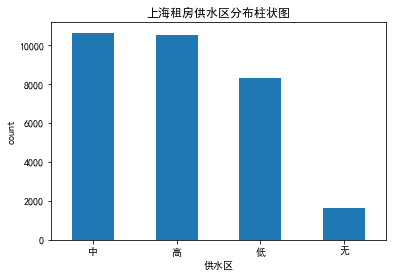

In [8]:
data["water_supply_region"].value_counts().plot(kind = "bar")
plt.xticks(rotation = 0)
plt.xlabel("供水区")
plt.ylabel("count")
plt.title("上海租房供水区分布柱状图")
plt.show()

### 楼层切段：0为1-5层，1为6-10层，2为11-20层，3为21-30层，4为30层以上

In [9]:
data["floor"] = data["floor"].apply(lambda x : 0 if (1 <= x <= 5) else x)
data["floor"] = data["floor"].apply(lambda x : 1 if (6 <= x <= 10) else x)
data["floor"] = data["floor"].apply(lambda x : 2 if (11 <= x <= 20) else x)
data["floor"] = data["floor"].apply(lambda x : 3 if (21 <= x <= 30) else x)
data["floor"] = data["floor"].apply(lambda x : 4 if (x > 30) else x)

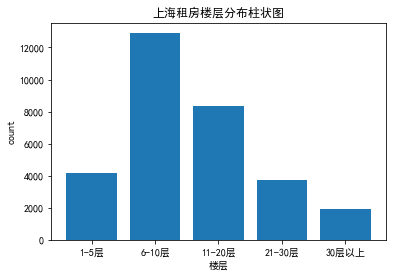

In [10]:
aa = data["floor"].value_counts()
cc = pd.DataFrame(aa)
cc.columns = ["count"]
cc["floor"] = cc.index
cc = cc.sort_values(by = "floor")
plt.bar(cc["floor"], cc["count"])
plt.xticks(cc["floor"], ["1-5层", "6-10层", "11-20层", "21-30层", "30层以上"], rotation = 0)
plt.xlabel("楼层")
plt.ylabel("count")
plt.title("上海租房楼层分布柱状图")
plt.show()

### 2、处理朝向

In [11]:
data["chaoxiang"].value_counts()

无朝向数据    14961
朝南        8506
朝南北       6118
朝北         406
朝西南        307
朝东南        286
朝西         182
朝东         172
朝西北         67
朝东西         64
朝东北         60
Name: chaoxiang, dtype: int64

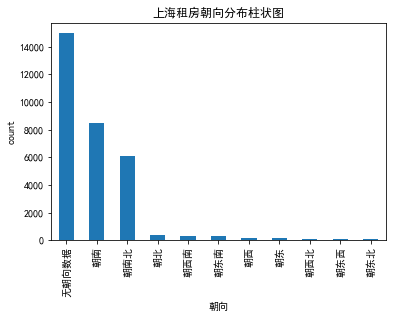

In [12]:
data["chaoxiang"].value_counts().plot(kind = "bar")
plt.xlabel("朝向")
plt.ylabel("count")
plt.title("上海租房朝向分布柱状图")
plt.show()


In [13]:
data["chaoxiang"] = data["chaoxiang"].apply(lambda x : x.strip())

In [14]:
qita = ["朝北", "朝东", "朝东北", "朝东南", "朝东西", "朝西", "朝西北", "朝西南"]
for each in qita:
    data["chaoxiang"] = data["chaoxiang"].apply(lambda x : "其他" if x == each else x)

In [15]:
data["chaoxiang"].value_counts()

无朝向数据    14961
朝南        8506
朝南北       6118
其他        1544
Name: chaoxiang, dtype: int64

### 3、处理title

###        没什么用，直接去掉好了

In [16]:
data.drop("title", axis = 1, inplace = True)

### 4、处理日期

In [17]:
data["date"].value_counts().head()

2017.09.06\n\t\t\t\t\t\t\t上架    708
2017.09.03\n\t\t\t\t\t\t\t上架    683
2017.09.10\n\t\t\t\t\t\t\t上架    681
2017.09.02\n\t\t\t\t\t\t\t上架    659
2017.09.09\n\t\t\t\t\t\t\t上架    656
Name: date, dtype: int64

In [18]:
data["date"] = data["date"].apply(lambda x : x[: 10])
data["date"] = pd.to_datetime(data["date"])

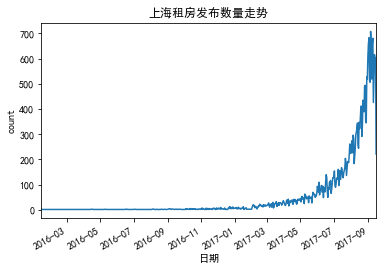

In [19]:
data["date"].value_counts().plot()
plt.xlabel("日期")
plt.ylabel("count")
plt.title("上海租房发布数量走势")
plt.show()

### 5、处理带看次数

### 切段：0为0次，1为1次，2为2-5次，3为6-10次，4为10次以上

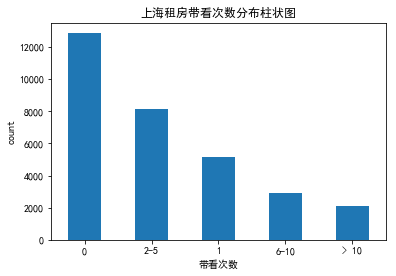

In [20]:
data["kanguo"] = data["kanguo"].apply(lambda x : 2 if (2 <= x <= 5) else x)
data["kanguo"] = data["kanguo"].apply(lambda x : 3 if (6 <= x <= 10) else x)
data["kanguo"] = data["kanguo"].apply(lambda x : 4 if (x > 10) else x)
data["kanguo"].value_counts().plot(kind = "bar")
plt.xlabel("带看次数")
plt.ylabel("count")
plt.title("上海租房带看次数分布柱状图")
plt.xticks([0, 1, 2, 3, 4], ["0", "2-5", "1", "6-10", "> 10"], rotation = 0)
plt.show()

In [21]:
data["kanguo"].value_counts()

0    12859
2     8107
1     5146
3     2916
4     2101
Name: kanguo, dtype: int64

### 6、处理面积

In [22]:
a = r"(.*?)平"
data["mianji"] = data["mianji"].apply(lambda x : re.findall(a, x)[0])
data["mianji"] = data["mianji"].astype(np.int64)

In [21]:
data["mianji"].describe()

count    31129.000000
mean       102.962061
std         76.504647
min          1.000000
25%         61.000000
50%         89.000000
75%        123.000000
max       5500.000000
Name: mianji, dtype: float64

### 7、处理区

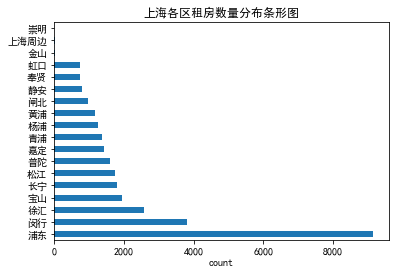

In [23]:
data["region"].value_counts().plot(kind = "barh")
plt.xlabel("count")
plt.title("上海各区租房数量分布条形图")
plt.show()

### 8、分离X室X厅

In [24]:
data["rooms"] = data["shiting"].apply(lambda x : re.findall(r"(.*?)室", x)[0])
data["living_rooms"] = data["shiting"].apply(lambda x : re.findall(r"室(.*?)厅", x)[0])
data["rooms"] = data["rooms"].astype(np.int64)
data["living_rooms"] = data["living_rooms"].astype(np.int64)

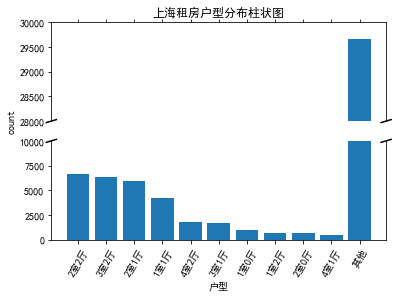

In [25]:
data["shiting"] = data["shiting"].apply(lambda x : x.strip())
aa = data["shiting"].value_counts()
#将计数为500以下的户型都纳入“其他”
qita = aa[: 10].sum()
aa = aa[: 10]
aa["其他"] = qita
cc = pd.DataFrame(aa)
cc["huxing"] = cc.index
fig, (ax, ax2) = plt.subplots(2, 1, sharex=True)
ax.bar(range(1, 12), cc["shiting"])
ax2.bar(range(1, 12), cc["shiting"])
ax.set_ylim(28000, 30000)
ax2.set_ylim(0, 10000)
ax.spines["bottom"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop = "off")
ax2.xaxis.tick_bottom()
plt.xticks(range(1, 12), list(cc["huxing"]), rotation = 60)

#绘制坐标轴截断线
d = .015
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)
kwargs.update(transform=ax2.transAxes)
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

plt.xlabel("户型")
ax.set_title("上海租房户型分布柱状图")
ax.set_ylabel("count", position = (0, 0))
plt.show()

### 画完图把shiting一列丢掉

In [26]:
data.drop("shiting", axis = 1, inplace = True)
data.drop("date", axis = 1, inplace = True)

In [33]:
data.head()

,chaoxiang,kanguo,mianji,price,region,water_supply_region,floor,rooms,living_rooms
0,朝南,4,66,4600,浦东,中,1,2,1
1,朝南北,4,50,3700,闵行,高,1,1,1
2,朝南北,4,89,7500,浦东,中,2,3,2
3,朝南,4,32,7000,静安,中,0,1,0
4,无朝向数据,4,57,3800,杨浦,中,1,2,1


### 9、处理街道、小区

### 比较杂乱，去掉好了

In [27]:
data.drop(["street", "xiaoqu"], axis = 1, inplace = True)

In [28]:
data.head()

,chaoxiang,kanguo,mianji,price,region,water_supply_region,floor,rooms,living_rooms
0,朝南,4,66,4600,浦东,中,1,2,1
1,朝南北,4,50,3700,闵行,高,1,1,1
2,朝南北,4,89,7500,浦东,中,2,3,2
3,朝南,4,32,7000,静安,中,0,1,0
4,无朝向数据,4,57,3800,杨浦,中,1,2,1


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31129 entries, 0 to 31128
Data columns (total 9 columns):
chaoxiang              31129 non-null object
kanguo                 31129 non-null int64
mianji                 31129 non-null int64
price                  31129 non-null int64
region                 31129 non-null object
water_supply_region    31129 non-null object
floor                  31129 non-null int64
rooms                  31129 non-null int64
living_rooms           31129 non-null int64
dtypes: int64(6), object(3)
memory usage: 2.4+ MB


## 四、多变量分析

### 1、各区租房价格

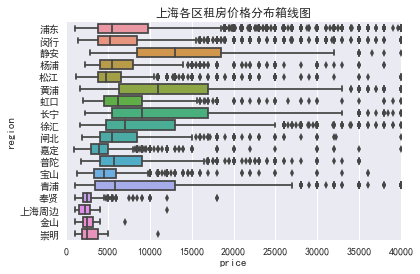

In [42]:
from pylab import *  
mpl.rcParams['font.sans-serif'] = ['SimHei']  
sns.boxplot(x = "price", y = "region", data = data)
plt.title("上海各区租房价格分布箱线图")
plt.xlim(0, 40000)
plt.show()

### 2、各区租房面积

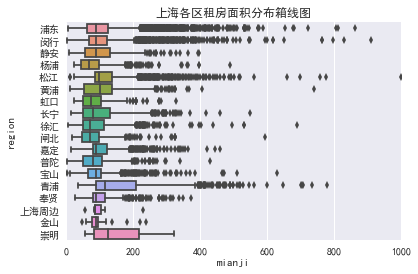

In [43]:
sns.boxplot(x = "mianji", y = "region", data = data)
plt.title("上海各区租房面积分布箱线图")
plt.xlim(0, 1000)
plt.show()

### 3、各区租房单价

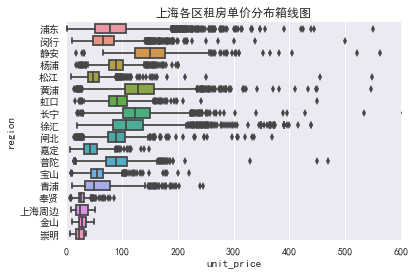

In [45]:
data["unit_price"] = data["price"] / data["mianji"]
sns.boxplot(x = "unit_price", y = "region", data = data)
plt.title("上海各区租房单价分布箱线图")
plt.xlim(0, 600)
plt.show()

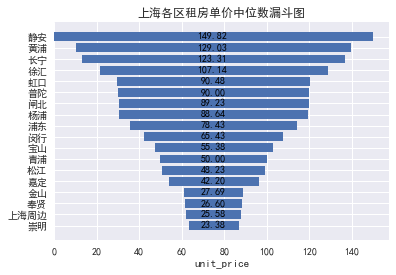

In [44]:
aa = data["unit_price"].groupby(data["region"]).median().sort_values(ascending = True)
cc = pd.DataFrame(aa)
cc["region"] = cc.index
cc["place_holder"] = (150 - cc["unit_price"]) / 2
fig, ax = plt.subplots()
ax.barh(range(len(cc)), cc["unit_price"], align = "center", left = cc["place_holder"])
plt.yticks(range(len(cc)), cc["region"], rotation = 0)
labels = ["%.2f"%each for each in cc["unit_price"]]
for i in range(len(cc.iloc[4:, :])):
    ax.text(x = 69, y = [k for k in range(len(cc))][i] - .2, s = labels[i], color = "black", size = 10)
for i in range(len(cc.iloc[0:4, :])):
    ax.text(x = 67.3, y = [14,15,16,17][i] - .2, s = labels[i + 14], color = "black", size = 10)
plt.xlabel("unit_price")
plt.title("上海各区租房单价中位数漏斗图")
plt.show()

### 4、朝向对价格的影响

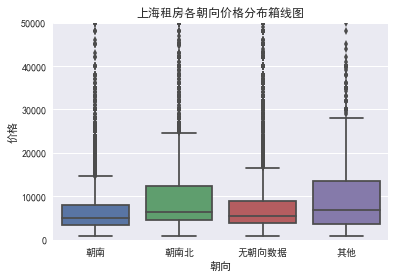

In [32]:
from pylab import *  
mpl.rcParams['font.sans-serif'] = ['SimHei']  
sns.boxplot(x = "chaoxiang", y = "price", data = data)
plt.xlabel("朝向")
plt.ylabel("价格")
plt.title("上海租房各朝向价格分布箱线图")
plt.ylim(0,50000)
plt.show()

## 五、租房价格预测

### 1、预处理

#### 分类变量one-hot encode

In [36]:
data.head(10)

,chaoxiang,kanguo,mianji,price,region,water_supply_region,floor,rooms,living_rooms
0,朝南,4,66,4600,浦东,中,1,2,1
1,朝南北,4,50,3700,闵行,高,1,1,1
2,朝南北,4,89,7500,浦东,中,2,3,2
3,朝南,4,32,7000,静安,中,0,1,0
4,无朝向数据,4,57,3800,杨浦,中,1,2,1
5,朝南北,4,90,4600,松江,高,2,2,2
6,朝南,4,68,5500,闵行,高,1,2,2
7,朝南,3,68,5300,闵行,中,1,2,1
8,其他,3,98,12000,黄浦,高,4,2,2
9,无朝向数据,4,50,5960,静安,高,4,1,1


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31129 entries, 0 to 31128
Data columns (total 9 columns):
chaoxiang              31129 non-null object
kanguo                 31129 non-null int64
mianji                 31129 non-null int64
price                  31129 non-null int64
region                 31129 non-null object
water_supply_region    31129 non-null object
floor                  31129 non-null int64
rooms                  31129 non-null int64
living_rooms           31129 non-null int64
dtypes: int64(6), object(3)
memory usage: 2.4+ MB


In [37]:
data["kanguo"] = data["kanguo"].astype(str)
data["floor"] = data["floor"].astype(str)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31129 entries, 0 to 31128
Data columns (total 9 columns):
chaoxiang              31129 non-null object
kanguo                 31129 non-null object
mianji                 31129 non-null int64
price                  31129 non-null int64
region                 31129 non-null object
water_supply_region    31129 non-null object
floor                  31129 non-null object
rooms                  31129 non-null int64
living_rooms           31129 non-null int64
dtypes: int64(4), object(5)
memory usage: 2.4+ MB


In [38]:
new_data = pd.get_dummies(data)
new_data.head()

,mianji,price,rooms,living_rooms,chaoxiang_其他,chaoxiang_无朝向数据,chaoxiang_朝南,chaoxiang_朝南北,kanguo_0,kanguo_1,...,region_黄浦,water_supply_region_中,water_supply_region_低,water_supply_region_无,water_supply_region_高,floor_0,floor_1,floor_2,floor_3,floor_4
0,66,4600,2,1,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,50,3700,1,1,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
2,89,7500,3,2,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
3,32,7000,1,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,57,3800,2,1,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [39]:
new_data.columns

Index(['mianji', 'price', 'rooms', 'living_rooms', 'chaoxiang_其他',
       'chaoxiang_无朝向数据', 'chaoxiang_朝南', 'chaoxiang_朝南北', 'kanguo_0',
       'kanguo_1', 'kanguo_2', 'kanguo_3', 'kanguo_4', 'region_上海周边',
       'region_嘉定', 'region_奉贤', 'region_宝山', 'region_崇明', 'region_徐汇',
       'region_普陀', 'region_杨浦', 'region_松江', 'region_浦东', 'region_虹口',
       'region_金山', 'region_长宁', 'region_闵行', 'region_闸北', 'region_青浦',
       'region_静安', 'region_黄浦', 'water_supply_region_中',
       'water_supply_region_低', 'water_supply_region_无',
       'water_supply_region_高', 'floor_0', 'floor_1', 'floor_2', 'floor_3',
       'floor_4'],
      dtype='object')

### 2、分集

In [49]:
from sklearn.model_selection import train_test_split

X = new_data.drop("price", axis = 1).values
y = new_data["price"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 71)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21790, 39)
(9339, 39)
(21790,)
(9339,)


### 3、随机森林

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rf = RandomForestRegressor(n_estimators = 1000, n_jobs = 7, max_depth = 10, random_state = 71)
rf.fit(X_train, y_train)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
print("R^2 train: %.3f, test: %.3f" % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

R^2 train: 0.845, test: 0.627
